# 주제 : 서울시 공공 자전거 수요 분석

- 자료 출처
    - http://data.seoul.go.kr
    - https://archive.ics.uci.edu/ml/machine-learning-databases/00560/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\Windows\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

# 1. Data Definition

- Rented Bike Count : 종속변수

In [ ]:
bike = pd.read_csv("data/SeoulBikeData.csv")
bike.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

# 2. ❕❗ Quiz ❕❗

### 1) 시간대 별로 평균 몇 대가 대여되었을까

In [ ]:
hour_rent = bike.groupby("Hour")[["Rented Bike Count"]].mean()
hour_rent

,Rented Bike Count
Hour,
0,541.460274
1,426.183562
2,301.630137
3,203.331507
4,132.591781
5,139.082192
6,287.564384
7,606.005479
8,1015.701370


### 2) 위의 결과를 시각화

Text(16, 150, '퇴근')

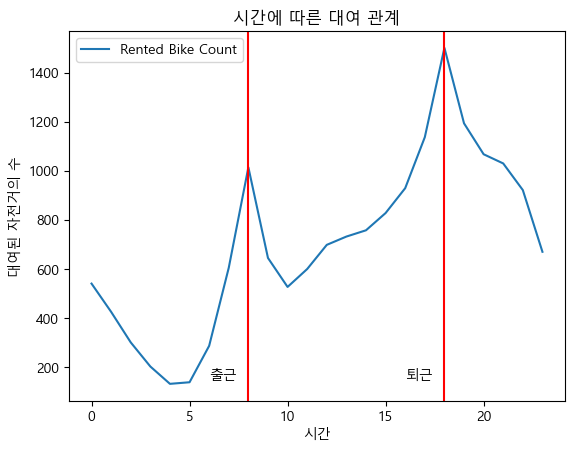

In [ ]:
hour_chart = hour_rent.plot()
hour_chart.set_title("시간에 따른 대여 관계")
hour_chart.set_xlabel("시간")
hour_chart.set_ylabel("대여된 자전거의 수")

plt.axvline(x=8, color="r")  # x축 원하는 점에 선을 그려 강조해줌
plt.axvline(x=18, color="r")
plt.text(6, 150, "출근")      # 원하는 좌표에 글자 출력 가능
plt.text(16, 150, "퇴근")

### 3) 요일별로 평균 몇 대가 대여되었을까

(1) 첫번째 방법
// 함수이용

In [ ]:
# 문자형식을 날짜형식으로(to_datetime) 바꾼 후 요일(dt.weekday) 뽑아내기
bike["Weekday_1"] = pd.to_datetime(bike["Date"], format="%d/%m/%Y").dt.weekday   # format지정해주기
bike

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday_1
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,4
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,4
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,4


(2) 두번째 방법
// 2016년 1월 1일은 금요일이다. 현재 날짜에서 2016년 1월 1일을 빼준다. 그 날짜의 차이를 7로 나눠준다. 나머지가 0이면 금요일.

In [ ]:
date_diff = pd.to_datetime(bike["Date"], format="%d/%m/%Y") - pd.to_datetime("2016-01-01")
new = date_diff.astype(str).str.split(" ", expand=True)[0].astype(int)
# expand=True : 리스트를 각각의 결과값으로 분리 -> 데이터프레임 형식 형성

def func_week(x):
    if x % 7 == 0:
        return "금요일"
    elif x % 7 == 1:
        return "토요일"
    elif x % 7 == 2:
        return "일요일"
    elif x % 7 == 3:
        return "월요일"
    elif x % 7 == 4:
        return "화요일"
    elif x % 7 == 5:
        return "수요일"
    elif x % 7 == 6:
        return "목요일"

bike["Weekday_1"] = new.apply(func_week)
bike

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday_1
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,금요일
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,금요일
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,금요일
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,금요일


In [ ]:
# 더 간단하게 #
bike["Weekday_2"] = (((pd.to_datetime(bike["Date"], format="%d/%m/%Y")
                       - pd.to_datetime("2016-01-01")).dt.days) % 7).map({0: '금요일', 1:'토요일', 2:'일요일',
                                                                          3:'월요일', 4:'화요일', 5:'수요일', 6:'목요일'})
bike

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday_1,Weekday_2
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,금요일,금요일
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,금요일,금요일
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,금요일,금요일
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,금요일,금요일


In [ ]:
#### 요일별 대여횟수 조회 ####
bike.groupby("Weekday_2")[["Rented Bike Count"]].mean()

,Rented Bike Count
Weekday_2,
금요일,747.117925
목요일,690.704327
수요일,740.349359
월요일,730.563301
일요일,625.155449
토요일,709.528846
화요일,687.977564


In [ ]:
import datetime

# 요일뽑아내기
date_list=[ datetime.datetime.strptime(bike["Date"][i], "%d/%m/%Y").weekday() for i in range(len(bike)) ]
# 요일 컬럼 추가
bike["Weekday"] = date_list

weekday_rent = bike.groupby("Weekday")[["Rented Bike Count"]].mean().round()
weekday_rent

# 문자로도 추가해보기
dateDict = {0: 'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
bike["Weekday_1"] = bike["Weekday"].map(dateDict)
bike.head(30)

,Rented Bike Count
Weekday,
0,731.0
1,688.0
2,740.0
3,691.0
4,747.0
5,710.0
6,625.0


### 4) 위의 결과를 시각화

<AxesSubplot:xlabel='Weekday_2', ylabel='Rented Bike Count'>

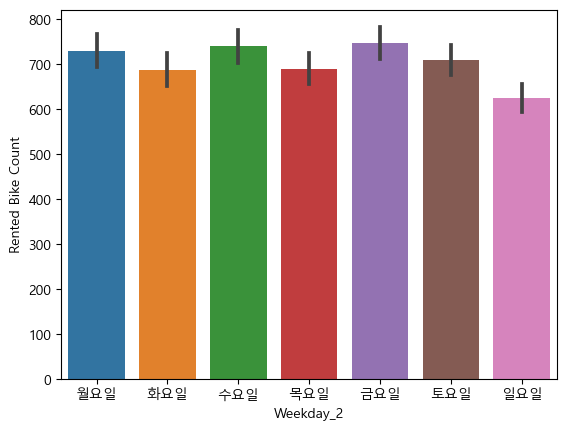

In [ ]:
sns.barplot(x="Weekday_2", y="Rented Bike Count", data=bike,
            order=["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"])  # order : x축 순서 지정 가능

Text(0, 0.5, 'Rented Bike')

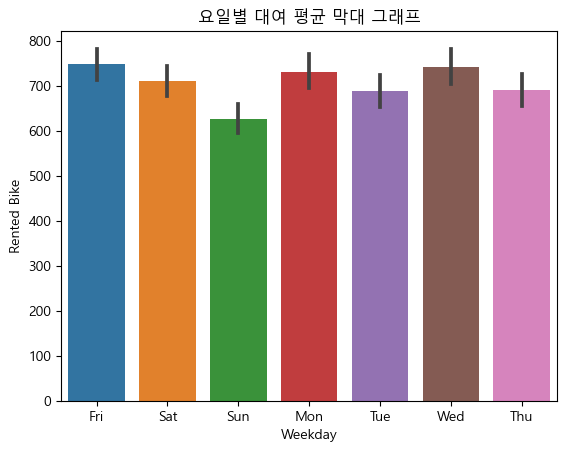

In [ ]:
weekday_chart = sns.barplot(x="Weekday_1", y="Rented Bike Count", data=bike)
weekday_chart.set_title("요일별 대여 평균 막대 그래프")
weekday_chart.set_xlabel("Weekday")
weekday_chart.set_ylabel("Rented Bike")

### 5) 요일별, 시간대별로 동시에 시각화

-> 요일별로 7개 그래프를 만든 후 시간대별로 확인

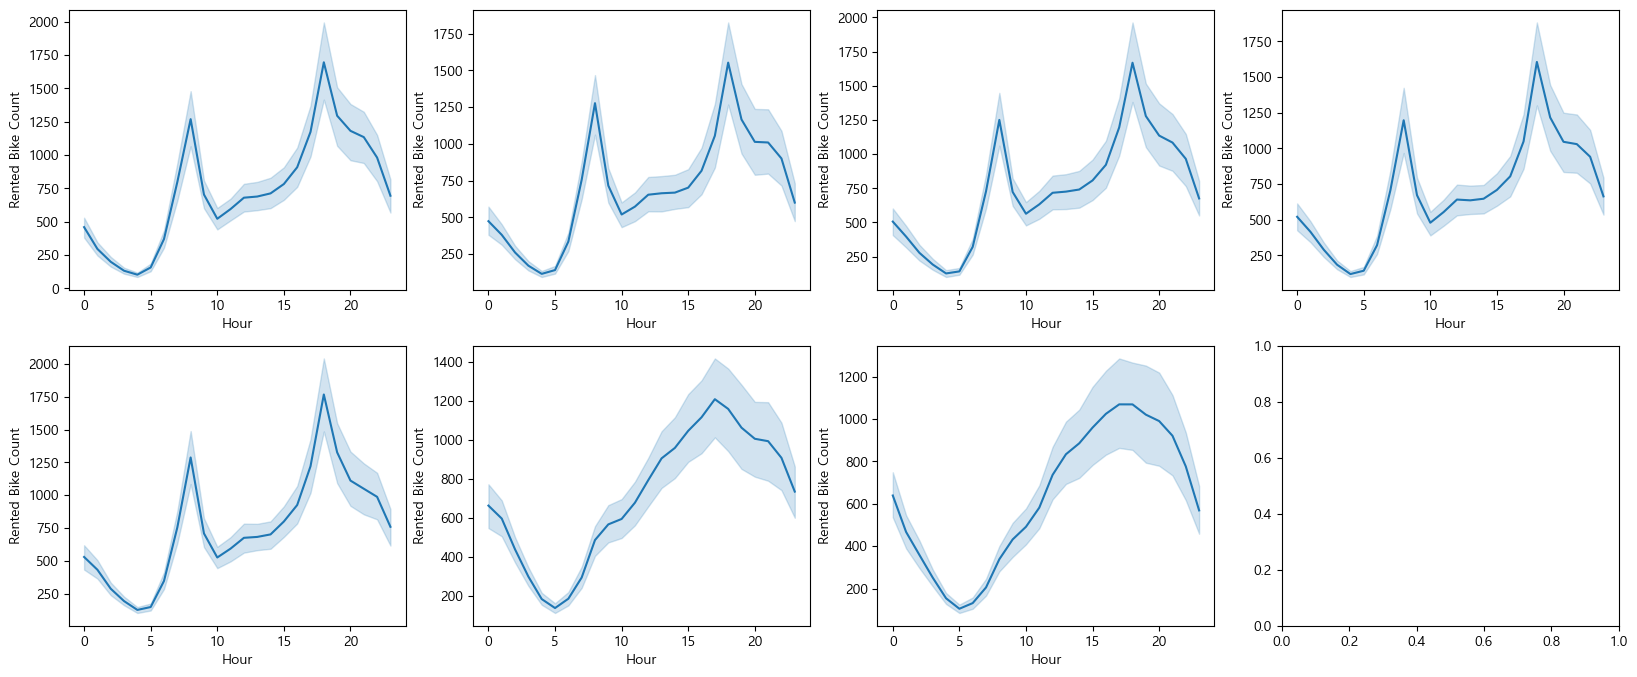

In [ ]:
_, ax = plt.subplots(2, 4, figsize=(20, 8))  # 그래프 위치 생성, 튜플로 두개의 값 출력->변수 2개 필요

week_list = ["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"]
for i in range(7):
    sns.lineplot(x="Hour", y="Rented Bike Count", data=bike.loc[bike["Weekday_2"]==week_list[i]], ax=ax[i//4, i%4])

<AxesSubplot:ylabel='Hour'>

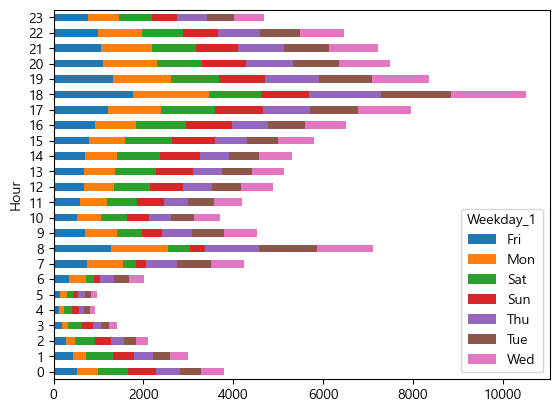

In [ ]:
a = bike.pivot_table(index="Hour", columns = "Weekday_1", values="Rented Bike Count")
a.plot(kind="barh", stacked=True)

### 6) 가장 많이 대여된 계절은 언제일까

In [ ]:
Season_chart = bike.groupby("Seasons")[["Rented Bike Count"]].mean().round()
Season_chart

,Rented Bike Count
Seasons,
Autumn,820.0
Spring,730.0
Summer,1034.0
Winter,226.0


<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

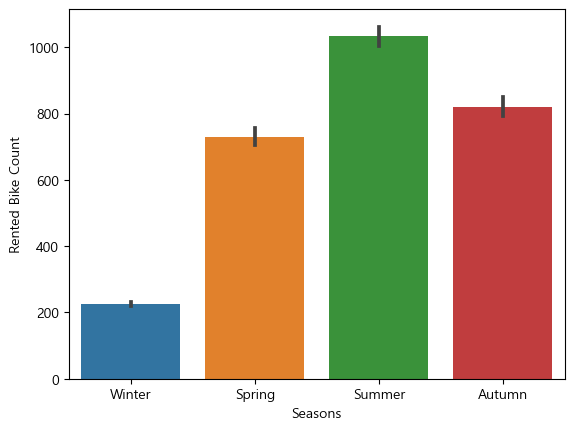

In [ ]:
sns.barplot(x="Seasons", y="Rented Bike Count", data=bike)

### 7) 온도와 대여횟수는 관계가 있는가(시각화로 확인)

<AxesSubplot:xlabel='Temperature(C)', ylabel='Rented Bike Count'>

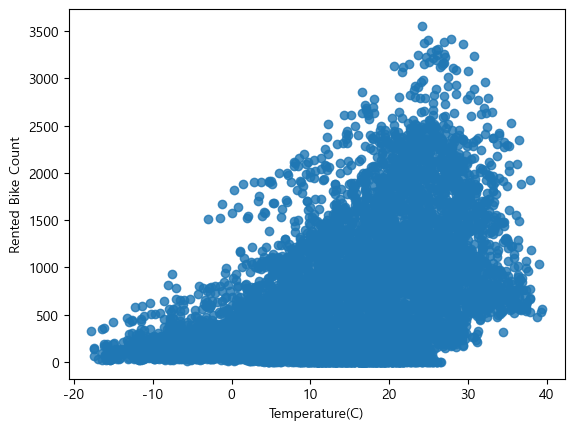

In [ ]:
sns.regplot(x="Temperature(C)",y="Rented Bike Count",data=bike, fit_reg=False)

<AxesSubplot:xlabel='Temperature(C)', ylabel='Rented Bike Count'>

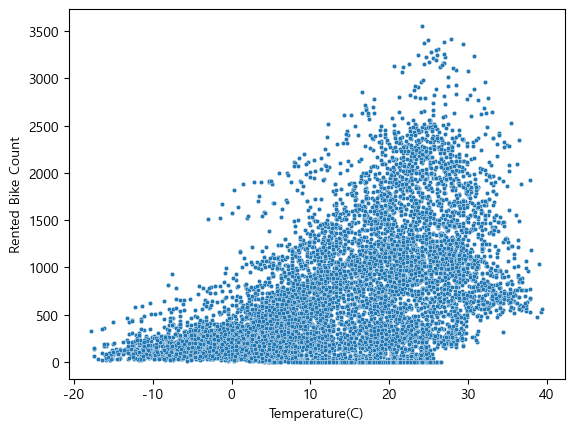

In [ ]:
sns.scatterplot(x="Temperature(C)",y="Rented Bike Count",data=bike, s=10)

<AxesSubplot:xlabel='Temperature(C)', ylabel='Rented Bike Count'>

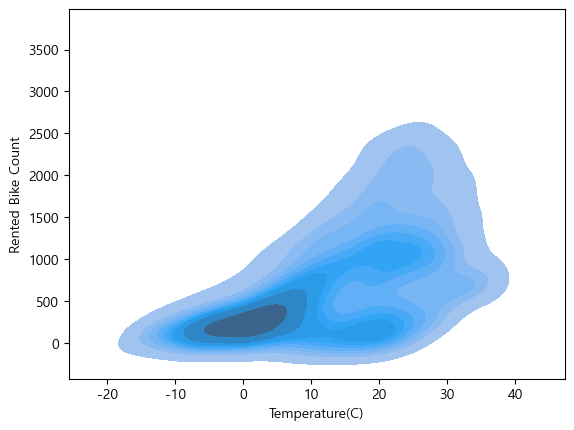

In [ ]:
sns.kdeplot(x="Temperature(C)", y="Rented Bike Count", data=bike, shade=True)

In [ ]:
Temperature_rent = bike.groupby("Temperature(C)")[["Rented Bike Count"]].mean()
Temperature_rent

,Rented Bike Count
Temperature(C),
-17.8,322.0
-17.5,145.5
-17.4,64.0
-16.9,36.0
-16.5,96.0
...,...
38.0,1184.0
38.7,475.0
39.0,1033.0


<AxesSubplot:xlabel='Temperature(C)'>

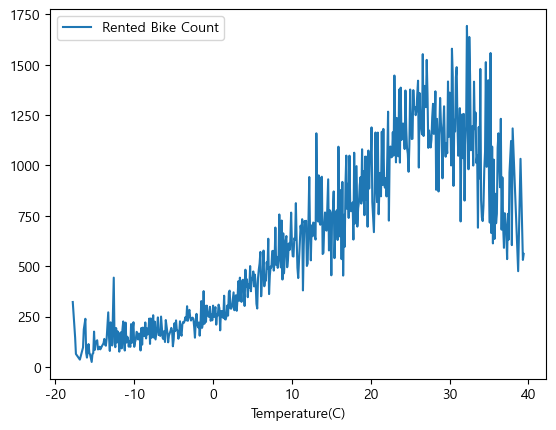

In [ ]:
Temperature_rent.plot()